In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [4]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
df.shape

(8807, 12)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Date            datetime64[ns]
dtype: object

In [12]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [13]:
df[df.duplicated()] #no duplicate values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date


In [14]:
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Date               0
dtype: int64

**Showing the null values using the heat map**

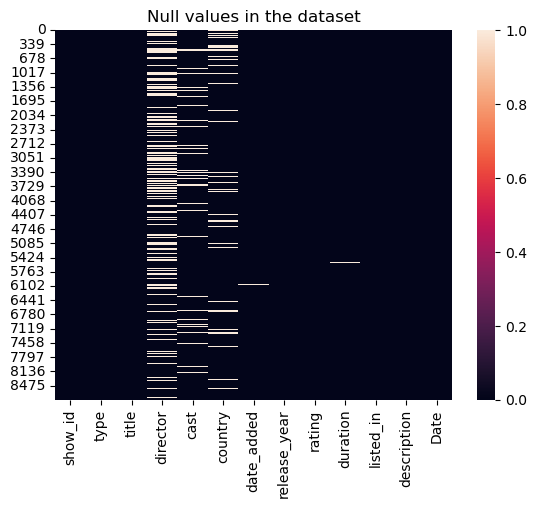

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna())
plt.title("Null values in the dataset")
plt.show()

In [20]:
df.fillna("-",inplace=True) # filling the null values with the -

In [21]:
df.isna().head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isna().sum() #no null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Date               0
dtype: int64

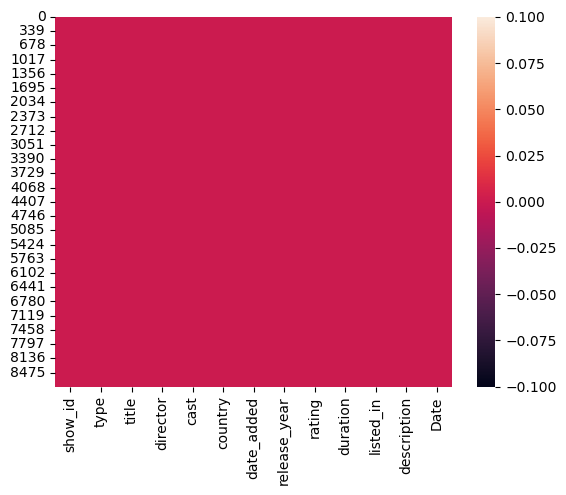

In [22]:
sns.heatmap(df.isna(),color='r')
plt.show()

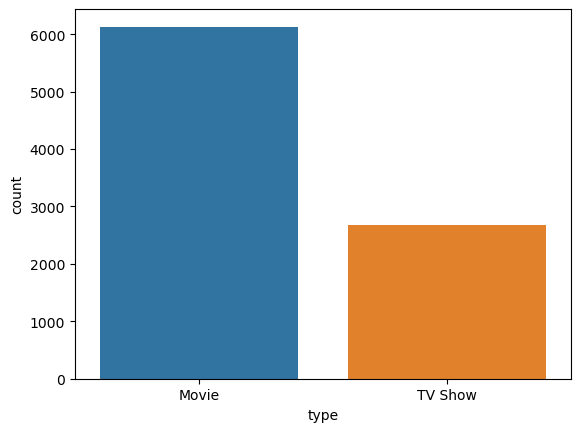

In [23]:
sns.countplot(x='type',data=df)
plt.show()

In [24]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,-,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020


In [35]:
yeardata=df.groupby('release_year')
yeardata

In [49]:
yeardata2020=yeardata.get_group(2020)
yeardata2020.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,-,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",-,-,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,1970-01-01 00:00:00.000002020
17,s18,TV Show,Falsa identidad,-,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,1970-01-01 00:00:00.000002020
32,s33,TV Show,Sex Education,-,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,1970-01-01 00:00:00.000002020
34,s35,TV Show,Tayo and Little Wizards,-,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",-,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,1970-01-01 00:00:00.000002020


In [151]:
yeardata2020['type'].value_counts()

Movie      517
TV Show    436
Name: type, dtype: int64

**Count of the type of show released in the year 2020**

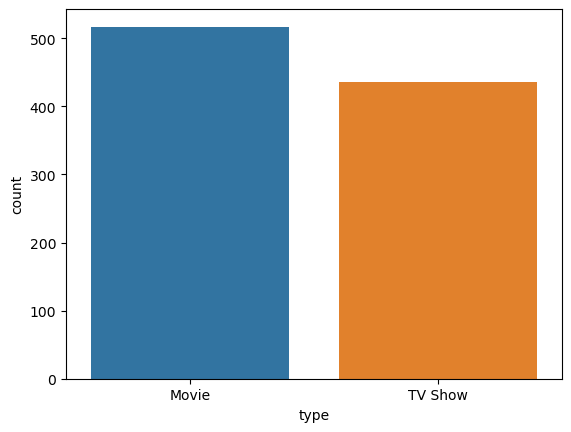

In [152]:
sns.countplot(x='type',data=yeardata2020)
plt.show()

In [154]:
dfabove10=df[df['release_year'] > 2010]

In [155]:
dfabove10

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,-,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
1,s2,TV Show,Blood & Water,-,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970-01-01 00:00:00.000002021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",-,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1970-01-01 00:00:00.000002021
3,s4,TV Show,Jailbirds New Orleans,-,-,-,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1970-01-01 00:00:00.000002021
4,s5,TV Show,Kota Factory,-,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1970-01-01 00:00:00.000002021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,1970-01-01 00:00:00.000002014
8800,s8801,TV Show,Zindagi Gulzar Hai,-,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1970-01-01 00:00:00.000002012
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,1970-01-01 00:00:00.000002015
8803,s8804,TV Show,Zombie Dumb,-,-,-,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1970-01-01 00:00:00.000002018


**Count of shows based on type realsed between 2010 and 2021**

<Axes: xlabel='release_year', ylabel='count'>

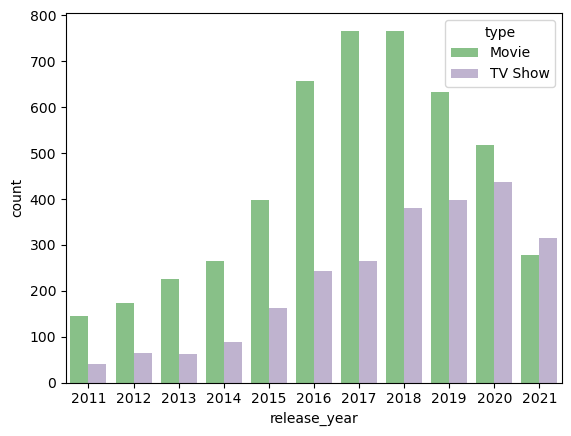

In [162]:
sns.countplot(x='release_year',data=dfabove10,hue='type',palette='Accent')

In [144]:
typegrp=df.groupby(['type'])

In [57]:
movies=typegrp.get_group('Movie')

In [63]:
moviesabove10=movies[movies['release_year'] > 2010]

In [64]:
moviesabove10['release_year'].value_counts()

2017    767
2018    767
2016    658
2019    633
2020    517
2015    398
2021    277
2014    264
2013    225
2012    173
2011    145
Name: release_year, dtype: int64

In [147]:
moviesabove10.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,-,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",-,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1970-01-01 00:00:00.000002021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1970-01-01 00:00:00.000002021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1970-01-01 00:00:00.000002021
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",-,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,1970-01-01 00:00:00.000002021


**Count of movies that released between 2010 and 2021**

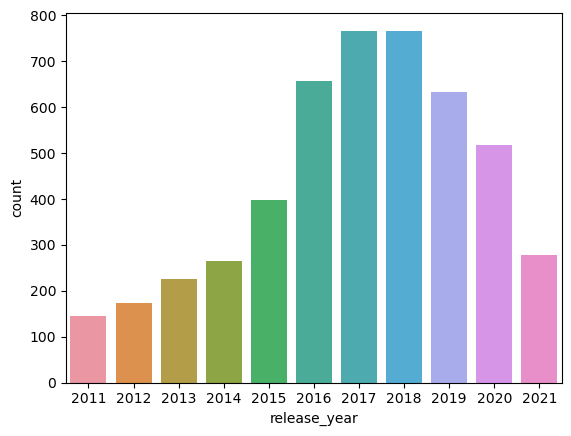

In [148]:
sns.countplot(x='release_year',data=moviesabove10)
plt.show()

In [70]:
fmovies=moviesabove10.filter(['release_year','country','duration'])

**Filter the dataset based on release year,country,duration realsed in india?**

In [108]:
indianmovies=fmovies.groupby('country').get_group('India')

In [143]:
indianmovies

,release_year,country,duration
105,2017,India,128 min
116,2015,India,114 min
118,2017,India,106 min
126,2020,India,115 min
190,2021,India,125 min
...,...,...,...
8762,2016,India,140 min
8771,2011,India,132 min
8772,2013,India,147 min
8798,2014,India,131 min


In [109]:
indianmovies.release_year.value_counts()

2017    98
2018    81
2019    74
2016    72
2020    59
2015    53
2013    51
2014    46
2012    36
2011    29
2021    22
Name: release_year, dtype: int64

**Count of movies released between 2011 and 2021**

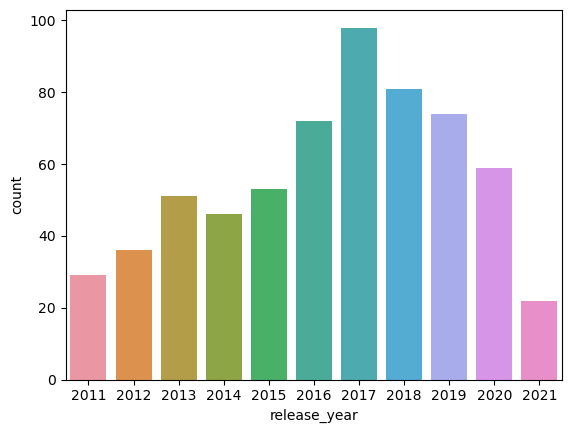

In [110]:
sns.countplot(x='release_year',data=indianmovies)
plt.show()

In [111]:
indianmovies.duration.value_counts()

127 min    18
133 min    16
131 min    16
117 min    15
120 min    14
           ..
59 min      1
152 min     1
64 min      1
176 min     1
53 min      1
Name: duration, Length: 111, dtype: int64

**Indian movies with duration of 165mins**

In [112]:
indianmovies[indianmovies['duration']=='165 min']

,release_year,country,duration
5334,2017,India,165 min
7565,2016,India,165 min


In [114]:
indianmovies[indianmovies['release_year']==2017]

,release_year,country,duration
105,2017,India,128 min
118,2017,India,106 min
2020,2017,India,127 min
3048,2017,India,129 min
3195,2017,India,135 min
...,...,...,...
8098,2017,India,132 min
8571,2017,India,104 min
8590,2017,India,151 min
8665,2017,India,121 min


**Indian movies that realsed in the year 2020**

In [118]:
indianmovies[indianmovies['release_year']==2020]

,release_year,country,duration
126,2020,India,115 min
518,2020,India,105 min
913,2020,India,107 min
973,2020,India,149 min
1069,2020,India,145 min
1122,2020,India,121 min
1244,2020,India,115 min
1291,2020,India,91 min
1376,2020,India,127 min
1491,2020,India,109 min


In [119]:
indianmovies[indianmovies['release_year']==2017].value_counts()

release_year  country  duration
2017          India    110 min     5
                       128 min     5
                       135 min     4
                       126 min     4
                       127 min     4
                       104 min     3
                       105 min     3
                       120 min     3
                       150 min     3
                       117 min     3
                       132 min     2
                       124 min     2
                       133 min     2
                       103 min     2
                       139 min     2
                       153 min     2
                       145 min     2
                       125 min     2
                       151 min     2
                       89 min      2
                       112 min     2
                       116 min     2
                       96 min      1
                       93 min      1
                       155 min     1
                       162 min     1
      

In [121]:
moviesabove10['listed_in'].value_counts()

Documentaries                                       342
Stand-Up Comedy                                     303
Dramas, International Movies                        289
Dramas, Independent Movies, International Movies    220
Comedies, Dramas, International Movies              207
                                                   ... 
Comedies, Cult Movies, Independent Movies             1
Horror Movies, Romantic Movies, Sci-Fi & Fantasy      1
Children & Family Movies, Comedies, Cult Movies       1
Action & Adventure, Romantic Movies                   1
International Movies, Romantic Movies, Thrillers      1
Name: listed_in, Length: 221, dtype: int64

**List all the documentary films from india between 2010 and 2022**

In [124]:
moviesdoc=moviesabove10.groupby('listed_in').get_group('Documentaries')
moviesdoc

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,-,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,-,-,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,1970-01-01 00:00:00.000002021
117,s118,Movie,Final Account,Luke Holland,-,"United Kingdom, United States","September 2, 2021",2021,PG-13,94 min,Documentaries,This documentary stitches together never-befor...,1970-01-01 00:00:00.000002021
221,s222,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",Joshua Rofé,Bob Ross,-,"August 25, 2021",2021,TV-14,93 min,Documentaries,Bob Ross brought joy to millions as the world’...,1970-01-01 00:00:00.000002021
304,s305,Movie,Lady Boss: The Jackie Collins Story,Laura Fairrie,Jackie Collins,United Kingdom,"August 5, 2021",2021,TV-14,97 min,Documentaries,"""Queen of Sleaze"" or feminist pioneer? Powerho...",1970-01-01 00:00:00.000002021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8701,s8702,Movie,Water & Power: A California Heist,Marina Zenovich,-,United States,"February 1, 2018",2017,PG,78 min,Documentaries,California residents and farmers face powerful...,1970-01-01 00:00:00.000002017
8702,s8703,Movie,Waterschool,Tiffanie Hsu,-,"United States, Brazil, India, Uganda, China","July 25, 2018",2018,TV-G,68 min,Documentaries,"Six young women, who each live near one of Ear...",1970-01-01 00:00:00.000002018
8723,s8724,Movie,What Makes a Psychopath?,Rebecca Harrison,-,United Kingdom,"February 1, 2019",2017,TV-14,52 min,Documentaries,This wide-ranging documentary examines the beh...,1970-01-01 00:00:00.000002017
8737,s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,"February 1, 2019",2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...,1970-01-01 00:00:00.000002016


**List all the documentary films from the USA after 2010**

In [133]:
usa=moviesdoc[moviesdoc['country']=='United States']

In [134]:
usa

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,-,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
378,s379,Movie,Fantastic Fungi,Louie Schwartzberg,-,United States,"July 28, 2021",2019,TV-14,81 min,Documentaries,"Delve into the magical world of fungi, from mu...",1970-01-01 00:00:00.000002019
462,s463,Movie,This Changes Everything,Tom Donahue,-,United States,"July 15, 2021",2019,TV-MA,96 min,Documentaries,This documentary takes a deep look at gender d...,1970-01-01 00:00:00.000002019
727,s728,Movie,Picture a Scientist,"Ian Cheney, Sharon Shattuck",-,United States,"June 13, 2021",2020,TV-MA,97 min,Documentaries,"In this documentary, leading women scientists ...",1970-01-01 00:00:00.000002020
757,s758,Movie,Breaking Boundaries: The Science Of Our Planet,Jonathan Clay,"David Attenborough, Johan Rockström",United States,"June 4, 2021",2021,TV-PG,74 min,Documentaries,David Attenborough and scientist Johan Rockstr...,1970-01-01 00:00:00.000002021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,s8574,Movie,Theo Who Lived,David Shisgall,-,United States,"December 16, 2016",2016,TV-14,86 min,Documentaries,American journalist Theo Padnos retraces the M...,1970-01-01 00:00:00.000002016
8656,s8657,Movie,Unacknowledged,Michael Mazzola,-,United States,"August 21, 2017",2017,TV-MA,104 min,Documentaries,Noted UFO expert Dr. Steven Greer interviews w...,1970-01-01 00:00:00.000002017
8673,s8674,Movie,Vegas Baby,Amanda Micheli,-,United States,"July 4, 2017",2016,TV-14,78 min,Documentaries,A Las Vegas doctor's controversial online cont...,1970-01-01 00:00:00.000002016
8677,s8678,Movie,Vikings Unearthed,Harvey Lilley,Eric Meyers,United States,"March 1, 2017",2016,TV-PG,113 min,Documentaries,Archaeologist Sarah Parcak follows clues to ea...,1970-01-01 00:00:00.000002016


**Details Documentaries that released in the year 2021 in USA**

In [135]:
usa[usa['release_year']==2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
757,s758,Movie,Breaking Boundaries: The Science Of Our Planet,Jonathan Clay,"David Attenborough, Johan Rockström",United States,"June 4, 2021",2021,TV-PG,74 min,Documentaries,David Attenborough and scientist Johan Rockstr...,1970-01-01 00:00:00.000002021
870,s871,Movie,Amy Tan: Unintended Memoir,James Redford,Amy Tan,United States,"May 18, 2021",2021,TV-14,101 min,Documentaries,From her painful past to her successful career...,1970-01-01 00:00:00.000002021
1070,s1071,Movie,Why Did You Kill Me?,Fredrick Munk,-,United States,"April 14, 2021",2021,TV-MA,84 min,Documentaries,The line between justice and revenge blurs whe...,1970-01-01 00:00:00.000002021
1150,s1151,Movie,7 Yards: The Chris Norton Story,Jonathon Link,Chris Norton,United States,"March 30, 2021",2021,TV-PG,93 min,Documentaries,The true story of former college football play...,1970-01-01 00:00:00.000002021
1171,s1172,Movie,Seaspiracy,Ali Tabrizi,-,United States,"March 24, 2021",2021,TV-14,90 min,Documentaries,"Passionate about ocean life, a filmmaker sets ...",1970-01-01 00:00:00.000002021
1195,s1196,Movie,Operation Varsity Blues: The College Admission...,Chris Smith,Matthew Modine,United States,"March 17, 2021",2021,R,100 min,Documentaries,Reenactments drive this documentary investigat...,1970-01-01 00:00:00.000002021
1343,s1344,Movie,"Strip Down, Rise Up",Michèle Ohayon,-,United States,"February 5, 2021",2021,R,113 min,Documentaries,In an effort to reclaim their bodies and lives...,1970-01-01 00:00:00.000002021
1411,s1412,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali...",1970-01-01 00:00:00.000002021
1420,s1421,Movie,"Crack: Cocaine, Corruption & Conspiracy",Stanley Nelson,-,United States,"January 11, 2021",2021,TV-MA,90 min,Documentaries,"A cheap, powerful drug emerges during a recess...",1970-01-01 00:00:00.000002021
1425,s1426,Movie,Creating The Queen's Gambit,-,-,United States,"January 8, 2021",2021,TV-14,14 min,Documentaries,A fascinating character. Exquisite sets. A wig...,1970-01-01 00:00:00.000002021


**Titles of documentary movie that released in USA in the year 2021**

In [137]:
moviesdoc[moviesdoc['country']=='United States']['title']

0                                 Dick Johnson Is Dead
378                                    Fantastic Fungi
462                            This Changes Everything
727                                Picture a Scientist
757     Breaking Boundaries: The Science Of Our Planet
                             ...                      
8573                                    Theo Who Lived
8656                                    Unacknowledged
8673                                        Vegas Baby
8677                                 Vikings Unearthed
8701                 Water & Power: A California Heist
Name: title, Length: 237, dtype: object

**Check if Dark series is released and get the year and other details related to the series**

In [138]:
df[df['title']=='Dark']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
2327,s2328,TV Show,Dark,-,"Louis Hofmann, Oliver Masucci, Jördis Triebel,...","Germany, United States","June 27, 2020",2020,TV-MA,3 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A missing child sets four families on a franti...,1970-01-01 00:00:00.000002020


In [141]:
df[df['title']=='Dark'][['release_year','type','description']]

,release_year,type,description
2327,2020,TV Show,A missing child sets four families on a franti...


In [142]:
df[df['title']=='Dark']['description']  

2327    A missing child sets four families on a franti...
Name: description, dtype: object